
# Khipus.ai
## Applied Statistics with Python
### Inferential Statistics (Predictions): Probability Distributions​, Central Limit Theorem (CLT), Hypothesis Testing
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>


In [34]:

import numpy as np
import pandas as pd
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib for making easy and beautiful data visualizations.
import matplotlib.pyplot as plt


## Standard Normal Distribution
The normal distribution, also known as the Gaussian distribution, is a bell-shaped curve that is symmetric about the mean. It is defined by its mean (μ) and standard deviation (σ).

Note: The Standard Normal Distribution has a mean of zero and a standard deviation of one.​


### Example:
Below is an example of how to simulate and visualize a Normal Standard distribution Python.


In [ ]:
# Simulate normal distribution
# Generate 10,000 random samples from a normal distribution with mean (loc) 0 and standard deviation (scale) 1
#size = number of samples
normal_samples = np.random.normal(loc=0, scale=1, size=10000)

# Plot histogram
plt.figure(figsize=(10, 5))  # Create a new figure with a specified size
# Plot a histogram of the normal samples with a kernel density estimate (adds a KDE curve to the histogram) and 30 bins
sns.histplot(normal_samples, kde=True, bins=30)
plt.title('Normal Distribution (μ=0, σ=1)')  # Set the title of the plot
plt.xlabel('Value')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot

### Simulating Binomial Distribution

In [ ]:
# Simulate binomial distribution
# Generate 10,000 random samples from a binomial distribution 
binom_samples = np.random.binomial(n=10, p=0.5, size=10000) #with 10 trials and probability of success 0.5 (flipping a coin)| size=number of samples

# Plot histogram
plt.figure(figsize=(10, 5))  # Create a new figure with a specified size
sns.histplot(binom_samples, kde=False, bins=30)  # Plot a histogram of the binomial samples without a KDE curve and with 30 bins
plt.title('Binomial Distribution (n=10, p=0.5)')  # Set the title of the plot
plt.xlabel('Number of Successes')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.show()  # Display the plot


## Central Limit Theorem (CLT)
The Central Limit Theorem states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population's distribution.

### Example:


For The example we will use the dataset `data_dev.csv` contains information about developers survey, including their yearly compensation and their plans to use AI. Below is a brief description of the key columns in the dataset:

- `converted_comp_yearly`: The yearly compensation of the developers in USD.
- `plans_to_use_ai`: The developers' plans to use AI, categorized as 'Using', 'Plan to use', etc.

The dataset is used to perform various statistical analyses, including hypothesis testing and confidence interval calculations.
```

In [ ]:
data_dev_survey = pd.read_csv('data_dev.csv')# Load the data from the CSV file
data_dev_survey.head()# Display the first few rows of the data

### Note:

This code simulates and visualizes the sampling distribution of the mean using data from a population (converted_comp_yearly column). Here's a summary of what it does:

Population: Takes salary data (converted_comp_yearly) as the population.

Sampling: Repeatedly extracts 1000 random samples, each with 50 data points, from the population.

Calculate Means: Calculates the mean of each sample and stores it.

Histogram Plot: Displays the distribution of these sample means in a histogram, showing a bell-shaped curve (Central Limit Theorem).
The result illustrates how sample means are distributed, even when sampling repeatedly from the population.



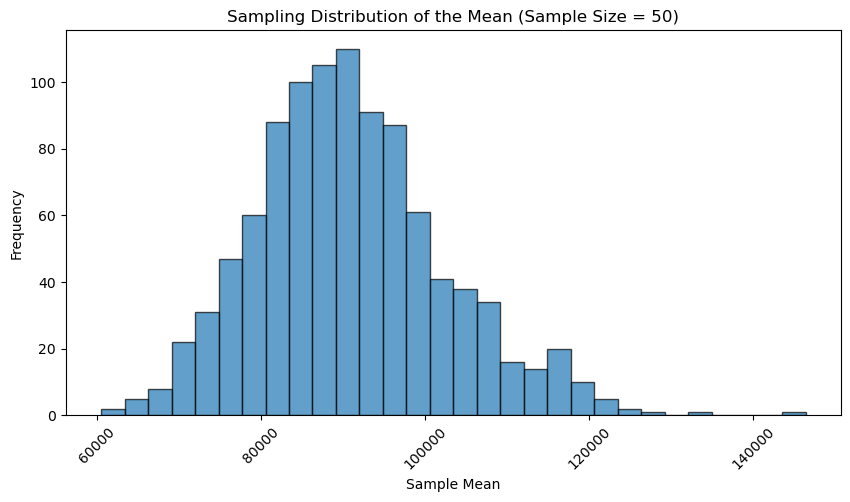

In [38]:
# Think of our data as a population to draw (extract) from
population = data_dev_survey['converted_comp_yearly'].dropna().values

# Generate a large sample from the 'converted_comp_yearly' column
# Parameters
sample_size = 50 
num_samples = 1000 # Number of samples to draw (extract) from the population

# Set a seed to make code reproducible
np.random.seed(2025)

# Simulate sampling distribution of the mean
sample_means = []# Create an empty list to store the sample means
for _ in range(num_samples):# Loop through the number of samples to draw
    sample = np.random.choice(population, sample_size)# Draw a sample of size 50 from the population
    sample_means.append(np.mean(sample))# Calculate the sample mean and append it to the list

# Plot the sampling distribution of the sample means
plt.figure(figsize=(10, 5))
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Sampling Distribution of the Mean (Sample Size = 50)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Hypothesis Testing

Hypothesis testing is a fundamental concept in statistics that allows researchers to make conclusions based on sample data. It begins with formulating a null hypothesis, which states that there is no effect or difference. The alternative hypothesis suggests otherwise. By determining a significance level, researchers can assess whether to reject the null hypothesis based on the evidence provided by the sample data.

Null Hypothesis (H₀): The population mean (Average) compensation is equal to 85000

Alternative hypothesis (Ha): The population mean (Average) is greater than 85000 (the hypothesized mean) 

## t-tests

In [ ]:
# One-sample t-test checking for evidence that mu compensation > 85000
salary_mean = 85000 # Hypothesized population mean
t_stat, p_value = stats.ttest_1samp( # Perform a one-sample t-test.
  data_dev_survey['converted_comp_yearly'].dropna(), # Sample data.The Null Hypothesis (H₀) is implicitly represented in the ttest_1samp function. 
 # Null Hypothesis (H₀): The population mean (Average) compensation is equal to 85000
 popmean = salary_mean,# Population mean
  alternative='greater')# Alternative hypothesis (Ha): the population mean (Average) is greater than the hypothesized mean

alpha = 0.05 # Significance level (α)The probability of making a Type I error (False Positive), commonly set at 0.05.

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Analyzing the results:

T-statistic: 2.387 indicates the number of standard deviations the sample mean is away from the hypothesized population mean (85000).

P-value: 0.0086. Since the p-value is less than 0.05, we reject the null hypothesis, indicating the mean compensation is likely greater than 85000.

### Two-sample t-test

Null Hypothesis (H₀): There is no difference in compensation between those currently using AI and those planning to use AI.

Alternative Hypothesis (H₁): There is a difference in compensation between those currently using AI and those planning to use AI.

In [ ]:
# Two-sample t-test comparing compensation across plans_to_use_ai groups
# Checking for a difference

# Extract compensation data for those currently using AI
using = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Using']['converted_comp_yearly'].dropna()

# Extract compensation data for those planning to use AI
plan_to_use = data_dev_survey[data_dev_survey['plans_to_use_ai'] == 'Plan to use']['converted_comp_yearly'].dropna()

# Perform a two-sample t-test to compare the means of the two groups
# 'equal_var=False' indicates that we do not assume equal population variances
t_stat, p_value = stats.ttest_ind(using, plan_to_use, equal_var=False)

# Print the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Analyzing the results:

Since the p-value (0.353) is greater than the common significance level (< 0.05), we fail to reject the null hypothesis. This suggests there is no significant difference in compensation between those currently using AI and those planning to use AI with the data that we have data_dev.csv dataset from 2023.